In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the employee_data_train

df = pd.read_csv('employee_data_train.csv')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
df.shape

(38363, 14)

- The dataset has 14 features and 38363 datapoints.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38363 entries, 0 to 38362
Data columns (total 14 columns):
employee_id             38363 non-null int64
department              38363 non-null object
region                  38363 non-null object
education               36643 non-null object
gender                  38363 non-null object
recruitment_channel     38363 non-null object
no_of_trainings         38363 non-null int64
age                     38363 non-null int64
previous_year_rating    35456 non-null float64
length_of_service       38363 non-null int64
KPIs_met >80%           38363 non-null int64
awards_won?             38363 non-null int64
avg_training_score      38363 non-null int64
is_promoted             38363 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 4.1+ MB


In [5]:
# Checking the features for the null values

df.isnull().sum()/len(df) * 100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.483487
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.577614
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

- There are 2 features having the missing values.
- a. education   
- b. prvious_year_rating

In [6]:
df = df.dropna()
df.shape

(34007, 14)

In [7]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

### Exploratory Data Analysis

In [8]:
df.drop('employee_id', axis=1, inplace=True)
df.shape

(34007, 13)

In [9]:
cat_features = df.select_dtypes(include='object')
cat_features.head(2)

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other


In [10]:
num_features = df.select_dtypes(include='number')
num_features.head(2)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,1,35,5.0,8,1,0,49,0
1,1,30,5.0,4,0,0,60,0


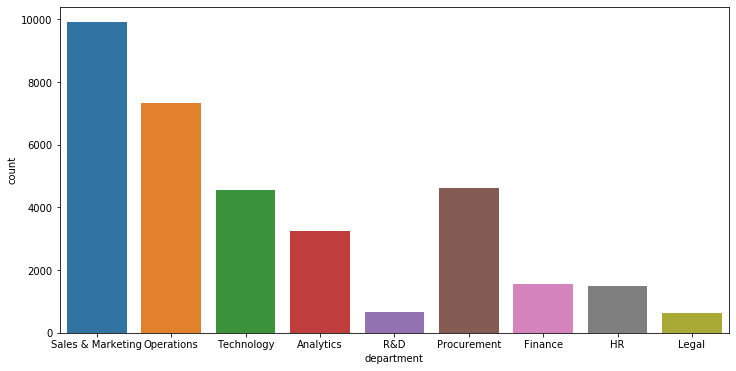

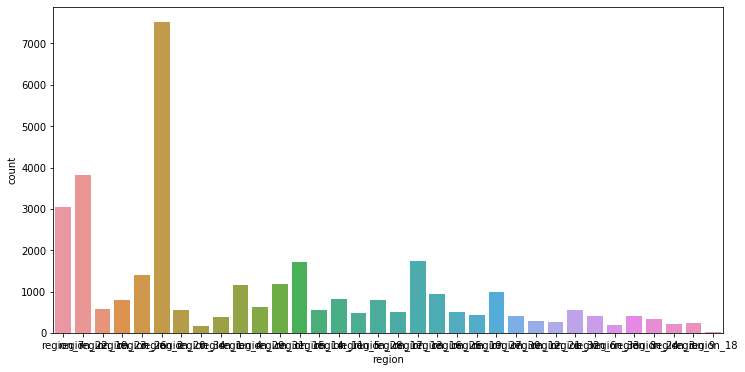

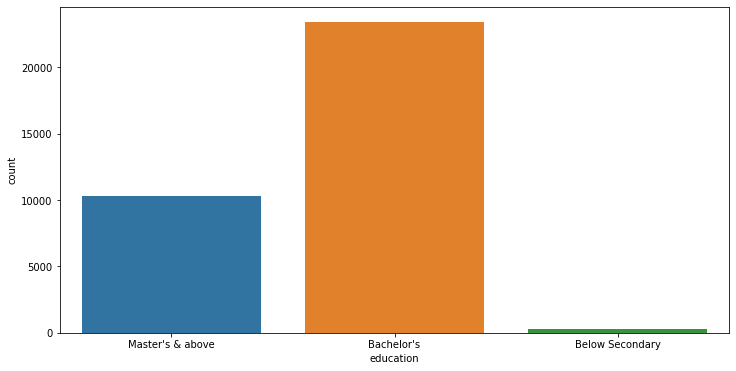

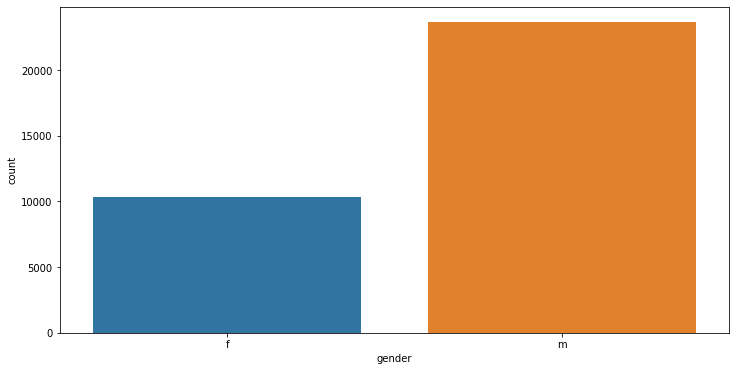

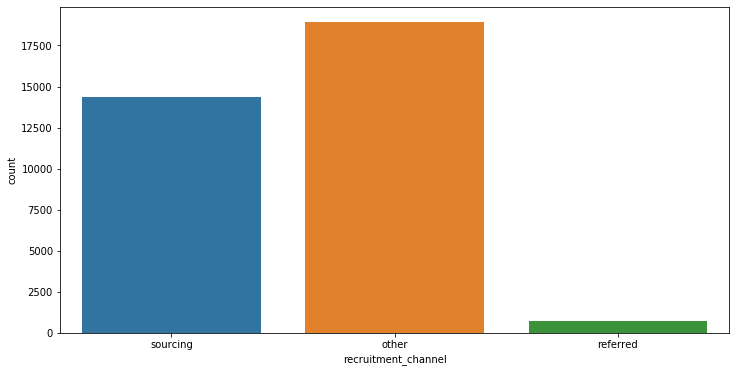

In [11]:
for i in cat_features:
    
    plt.figure(figsize=(12,6))
    sns.countplot(df[i])
    plt.show()

- From the above plots below are the observations:
- The maximum no of employees are in the Sales and Marketing department.
- Most the employees have a Bachelor's degree.
- Most of the employees are male.
- Most of the people are employeed through the 'Other' recruitment channel.

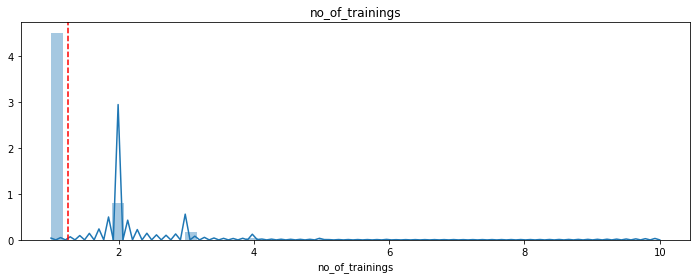

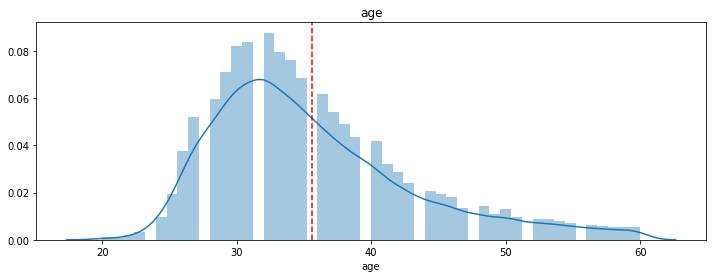

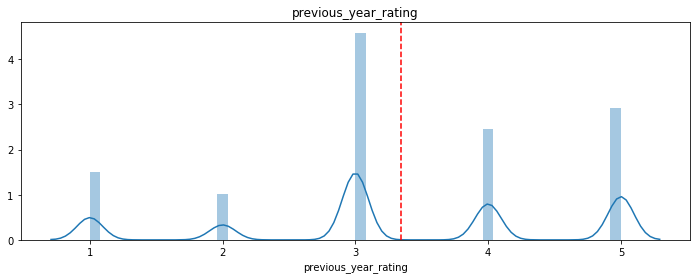

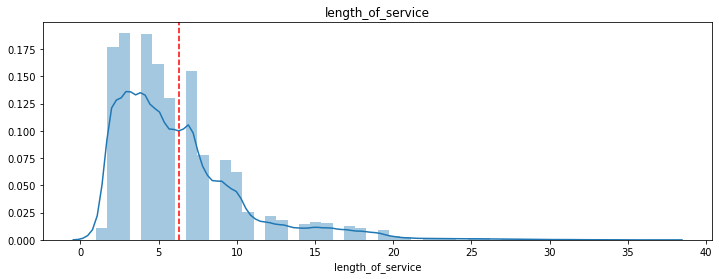

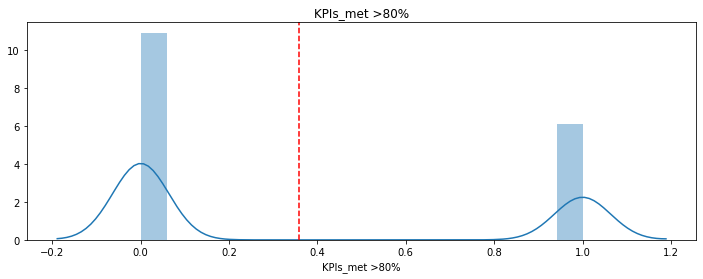

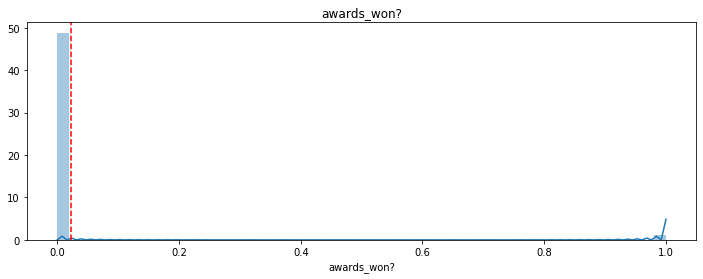

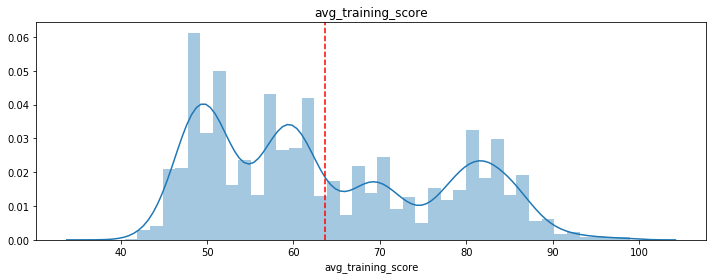

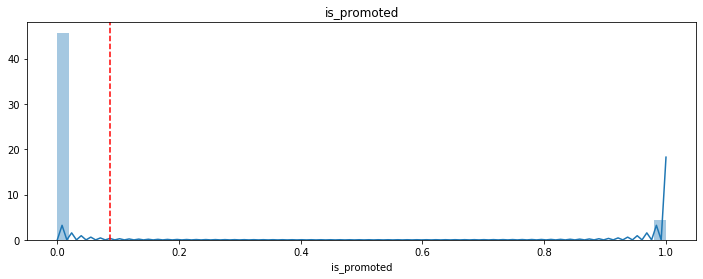

In [12]:
for i in num_features:
    
    plt.figure(figsize=(12,4))
    sns.distplot(df[i])
    plt.axvline(num_features[i].mean(), color='r', linestyle='--')
    plt.title(i)
    plt.show()

- From the above plots below are the observations:
- Most of the employees are in the age group 30-40.
- Most of the employees dont have the KPI's_met.
- The avergae training score is 63 app.
- Only few employees have got promotion.

In [13]:
# To find out the possibilities of the outliers and the skewness
df.groupby('is_promoted').mean()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
is_promoted,,,,,,,
0,1.254304,35.623081,3.279567,6.318733,0.325459,0.014257,62.92302
1,1.198705,35.063736,3.998637,6.190184,0.702454,0.116224,71.20484


In [14]:
df.groupby('is_promoted').median()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
is_promoted,,,,,,,
0,1,34,3.0,5,0,0,60
1,1,34,4.0,5,1,0,71


- We would get a right skewed distribution for most of the features.

### Chceking for Outliers

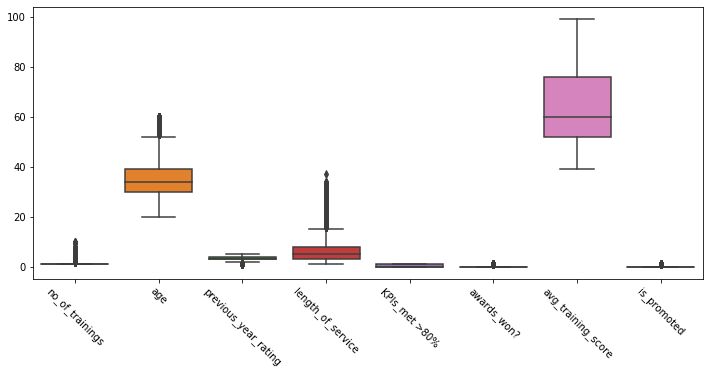

In [15]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df)
plt.xticks(rotation=-45)
plt.show()

- There are outliers for some of the data.

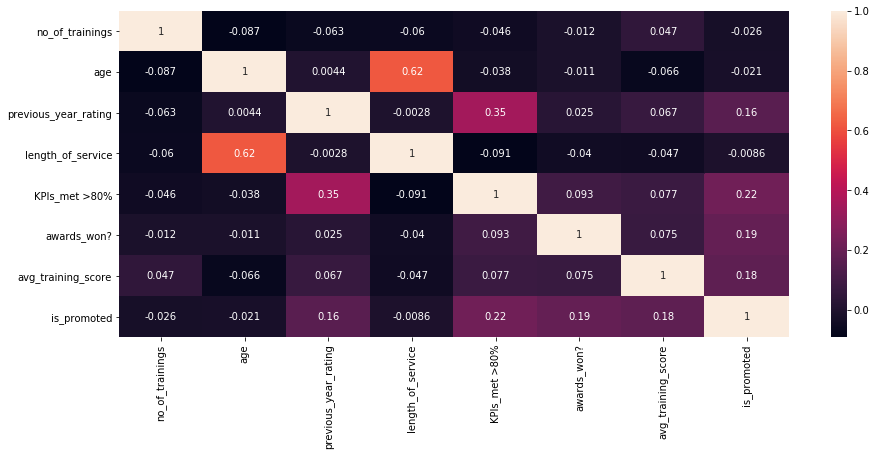

In [16]:
# Checking the correlation among the features

plt.figure(figsize=(15,6))
ax = sns.heatmap(df.corr(), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.show()

- The correlation between the age and length of service feature is the highest.
- The correlation between previous year rating and the KPI's met>80% is also high.

C:\Users\satyam\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\satyam\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


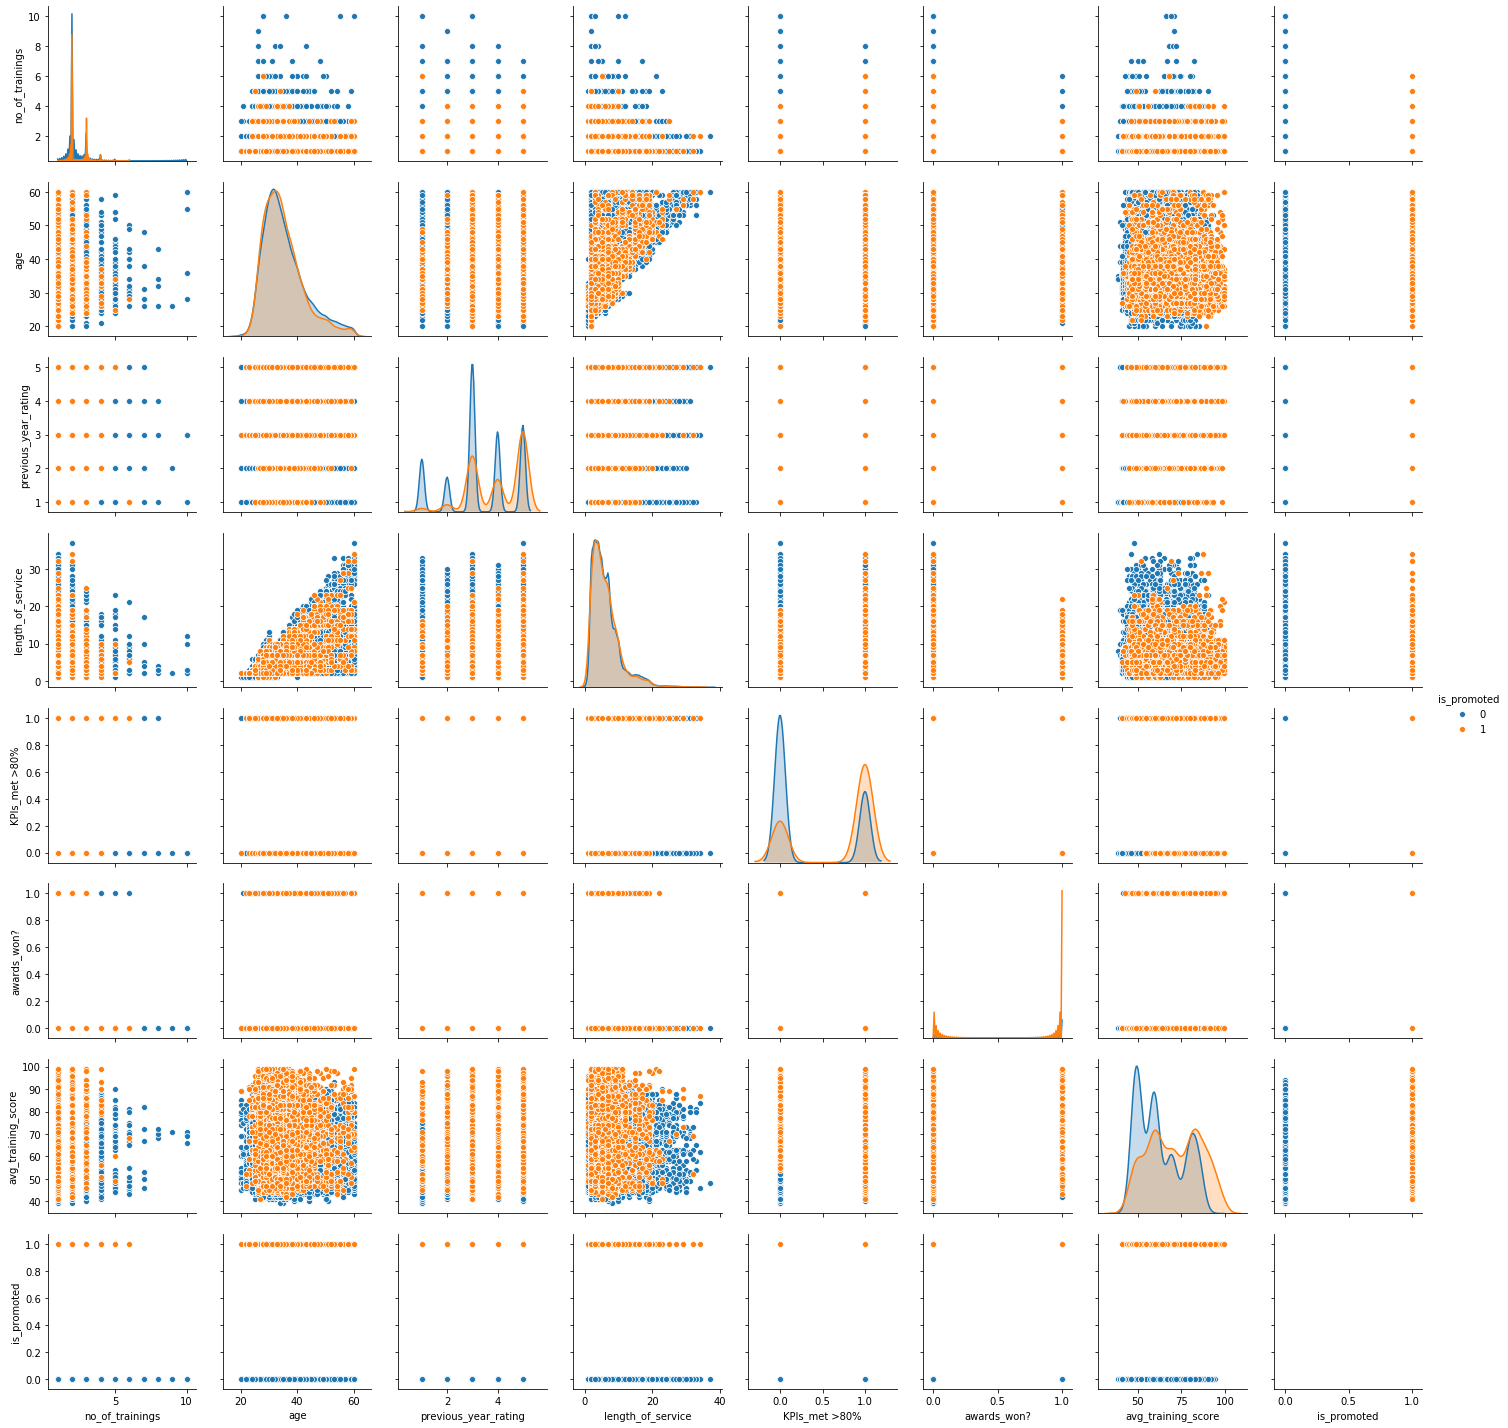

In [17]:
# Observe the distribution among the features

sns.pairplot(data=df, hue='is_promoted')
plt.show()

In [18]:
df_dummy = pd.get_dummies(data=df, drop_first=True)
df_dummy.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5.0,8,1,0,49,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,1,30,5.0,4,0,0,60,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,34,3.0,7,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2,39,1.0,10,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,45,3.0,2,0,0,73,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Building the Model

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

In [20]:
X = df_dummy.drop('is_promoted', axis=1)
y = df_dummy['is_promoted']
print(X.shape)
print(y.shape)

(34007, 53)
(34007,)


In [21]:
sc = StandardScaler()
Xc = sc.fit_transform(X)
Xc = pd.DataFrame(Xc, columns = X.columns)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(Xc, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(23804, 53)
(10203, 53)
(23804,)
(10203,)


## Model 1: Logistic Regression

In [23]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score: {0:.2f}".format(accuracy))
print("Train score: {0:0.2f}".format(lr.score(X_train, y_train)))
print("Test score: {0:0.2f}".format(lr.score(X_test, y_test)))

Accuracy score: 0.93
Train score: 0.93
Test score: 0.93


In [25]:
print(confusion_matrix(y_test, y_pred))

[[9238   59]
 [ 663  243]]


In [26]:
conf_mat = pd.DataFrame({'Test Value':y_test,'Predicted Value':y_pred})
conf_mat.replace({0:'Not Promoted',1:'Promoted'},inplace=True)
conf_mat.groupby(['Test Value','Predicted Value']).size().unstack('Predicted Value')

Predicted Value,Not Promoted,Promoted
Test Value,,
Not Promoted,9238,59
Promoted,663,243


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      9297
           1       0.80      0.27      0.40       906

    accuracy                           0.93     10203
   macro avg       0.87      0.63      0.68     10203
weighted avg       0.92      0.93      0.91     10203



In [28]:
df_dummy['is_promoted'].value_counts()

0    31073
1     2934
Name: is_promoted, dtype: int64

Since there are only few data points for the promoted category hence our model is not able to predict properly for the promoted category.

#### Logistic Regression model after resampling

In [29]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline

In [30]:
count_class_0 = 17007
count_class_1 = 17000
pipe = make_pipeline(SMOTE(sampling_strategy={1: count_class_1})
                    ,NearMiss(sampling_strategy={0: count_class_0}))
#sm = SMOTE(sampling_strategy={0:7963,1:5000}, k_neighbors=k, random_state=seed)
X_bal, y_bal = pipe.fit_resample(X, y)

In [31]:
y_bal.value_counts()

0    17007
1    17000
Name: is_promoted, dtype: int64

In [32]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_bal, y_bal, test_size=0.3, random_state=42, stratify=y_bal)

In [33]:
mod_lr = LogisticRegression()
mod_lr.fit(X_train_sm, y_train_sm)
y_pred_sm = mod_lr.predict(X_test_sm)

C:\Users\satyam\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [34]:
accuracy_sm = accuracy_score(y_test_sm, y_pred_sm)
print("Accuracy score: {0:.2f}".format(accuracy_sm))
print("Train score: {0:0.2f}".format(lr.score(X_train_sm, y_train_sm)))
print("Test score: {0:0.2f}".format(lr.score(X_test_sm, y_test_sm)))

Accuracy score: 0.81
Train score: 0.50
Test score: 0.50


In [35]:
print(classification_report(y_test_sm, y_pred_sm))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      5103
           1       0.82      0.79      0.81      5100

    accuracy                           0.81     10203
   macro avg       0.81      0.81      0.81     10203
weighted avg       0.81      0.81      0.81     10203



## Model 2: Decision Tree

In [36]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [37]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [38]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score: {0:.2f}".format(accuracy))
print("Train score: {0:0.2f}".format(lr.score(X_train, y_train)))
print("Test score: {0:0.2f}".format(lr.score(X_test, y_test)))

Accuracy score: 0.89
Train score: 0.09
Test score: 0.09


In [39]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: {0:0.2f}".format(accuracy))
print("Train Score: {0:0.3f}".format(dt.score(X_train, y_train)))
print("Test Score: {0:0.3f}".format(dt.score(X_test, y_test)))

Accuracy Score: 0.89
Train Score: 1.000
Test Score: 0.894


In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     10238
           1       0.41      0.44      0.42       985

    accuracy                           0.89     11223
   macro avg       0.68      0.69      0.68     11223
weighted avg       0.90      0.89      0.90     11223



#### Buiding the Decisom tree model with the scaled value

In [41]:
X_train, X_test, y_train, y_test = train_test_split( Xc, y, test_size=0.33, random_state=42)

In [42]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [43]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: {0:0.3f}".format(accuracy))
print("Train Score: {0:0.3f}".format(dt.score(X_train, y_train)))
print("Test Score: {0:0.3f}".format(dt.score(X_test, y_test)))

Accuracy Score: 0.892
Train Score: 1.000
Test Score: 0.892


In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     10238
           1       0.40      0.44      0.42       985

    accuracy                           0.89     11223
   macro avg       0.67      0.69      0.68     11223
weighted avg       0.90      0.89      0.89     11223



#### Decision Tree model after resampling

In [45]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_bal, y_bal, test_size=0.3, random_state=42, stratify=y_bal)

In [46]:
dt = DecisionTreeClassifier()
dt.fit(X_train_sm, y_train_sm)
y_pred = dt.predict(X_test_sm)

In [47]:
accuracy = accuracy_score(y_test_sm, y_pred_sm)
print("Accuracy Score: {0:0.3f}".format(accuracy))
print("Train Score: {0:0.3f}".format(dt.score(X_train_sm, y_train_sm)))
print("Test Score: {0:0.3f}".format(dt.score(X_test_sm, y_test_sm)))

Accuracy Score: 0.809
Train Score: 1.000
Test Score: 0.883


In [48]:
print(classification_report(y_test_sm, y_pred_sm))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      5103
           1       0.82      0.79      0.81      5100

    accuracy                           0.81     10203
   macro avg       0.81      0.81      0.81     10203
weighted avg       0.81      0.81      0.81     10203



## Model 3: Random Forest

In [49]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [50]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [51]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: {0:0.3f}".format(accuracy))
print("Train Score: {0:0.3f}".format(dt.score(X_train, y_train)))
print("Test Score: {0:0.3f}".format(dt.score(X_test, y_test)))

Accuracy Score: 0.931
Train Score: 0.920
Test Score: 0.917


In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10238
           1       0.87      0.25      0.39       985

    accuracy                           0.93     11223
   macro avg       0.90      0.62      0.68     11223
weighted avg       0.93      0.93      0.91     11223



#### Random Forest model after resampling of the data points

In [53]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_bal, y_bal, test_size=0.3, random_state=42, stratify=y_bal)

In [54]:
rf = RandomForestClassifier()
rf.fit(X_train_sm, y_train_sm)
y_pred_sm = rf.predict(X_test_sm)

In [55]:
accuracy = accuracy_score(y_test_sm, y_pred_sm)
print("Accuracy Score: {0:0.3f}".format(accuracy))
print("Train Score: {0:0.3f}".format(rf.score(X_train_sm, y_train_sm)))
print("Test Score: {0:0.3f}".format(rf.score(X_test_sm, y_test_sm)))

Accuracy Score: 0.915
Train Score: 1.000
Test Score: 0.915


In [56]:
print(classification_report(y_test_sm, y_pred_sm))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      5103
           1       0.92      0.91      0.91      5100

    accuracy                           0.92     10203
   macro avg       0.92      0.92      0.92     10203
weighted avg       0.92      0.92      0.92     10203



### Model 4: KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [65]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [66]:
knn

KNeighborsClassifier()

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     10238
           1       0.63      0.13      0.21       985

    accuracy                           0.92     11223
   macro avg       0.78      0.56      0.58     11223
weighted avg       0.90      0.92      0.89     11223



In [69]:
test = X_test.iloc[0,:].values.reshape(1,-1)

In [70]:
knn.kneighbors(test)

(array([[2.23606798, 2.44948974, 2.44948974, 2.44948974, 2.64575131]]),
 array([[17872,  2714, 12023,  2555, 20713]], dtype=int64))

In [ ]:
train_acc=[]
test_acc=[]
neig=np.arange(1,21)
for k in neig:
    knn_mod=KNeighborsClassifier(n_neighbors=k)
    knn_mod.fit(xtrain,ytrain)
    ypred_test=knn_mod.predict(xtest)
    ypred_train=knn_mod.predict(xtrain)
    train_acc.append(accuracy_score(ytrain,ypred_train))
    test_acc.append(accuracy_score(ytest,ypred_test))

In [74]:
train_acc = []
test_acc = []
neig = np.arange(1,22)
for k in neig:
    knn_mod = KNeighborsClassifier()
    knn_mod.fit(X_train, y_train)
    y_pred_test = knn_mod.predict(X_test)
    y_pred_train = knn_mod.predict(X_train)
    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))

In [ ]:
plt.figure(figsize=(13,8))
plt.xticks(neig)
plt.plot(neig,train_acc)
plt.plot(neig,test_acc)

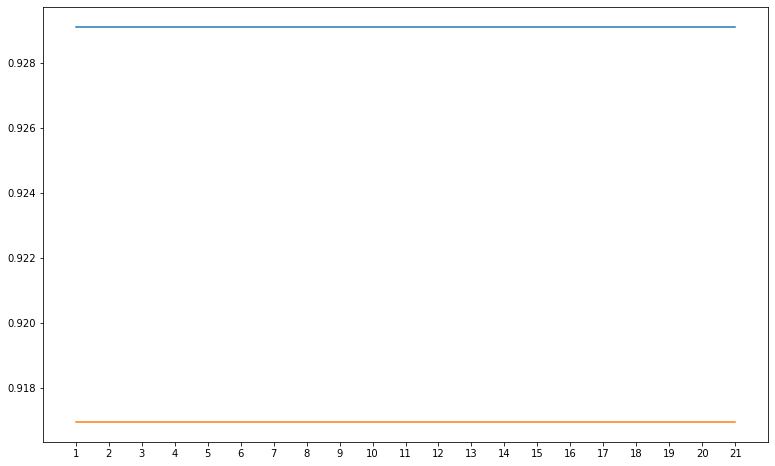

In [75]:
plt.figure(figsize=(13,8))
plt.xticks(neig)
plt.plot(neig, train_acc)
plt.plot(neig, test_acc)

In [77]:
mod = KNeighborsClassifier()

In [78]:
params={'n_neighbors':[3,5,7,9,11,15], 'metric':['minkowski'], 'p':[1,2,3,4,5,6], 'weights':['uniform', 'distance']}